In [42]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('D:\creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Data preprocessing

In [21]:
from sklearn.model_selection import train_test_split
y = data['Class']
X = data.drop(labels =['Class'],axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


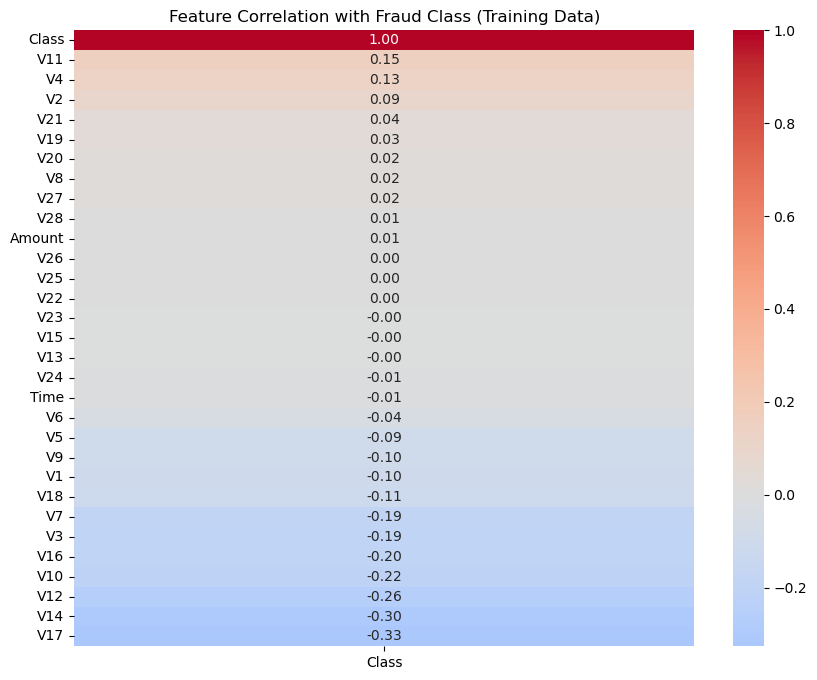

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr()

plt.figure(figsize=(10, 8))
class_corr = corr[['Class']].sort_values('Class', ascending=False)
sns.heatmap(class_corr, annot=True, cmap='coolwarm', center=0, annot_kws={'size': 10}, fmt='.2f')
plt.title('Feature Correlation with Fraud Class (Training Data)')
plt.show()

In [24]:
X.count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
dtype: int64

No missing data for this dataset

In [28]:
X_train, X_test, y_train, y_test = train_test_split( X , y , test_size = 0.25, stratify = y)
print("Fraud ratio in dataset:", y.mean())
print("Fraud ratio in training set:", y_train.mean())

Fraud ratio in dataset: 0.001727485630620034
Fraud ratio in training set: 0.0017274876524425926


Stratify is needed because the dataset is highly unbalanced as the fraud ratio is only 0.172%. The ensure the same fraud ratio for the training and the test set

StandardScaler is imported and an instance is created to do data standardization

In [32]:
train_index = X_train.index
test_index = X_test.index

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_df = pd.DataFrame(X_train_scaled, columns=X.columns, index=train_index)
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns, index=test_index)

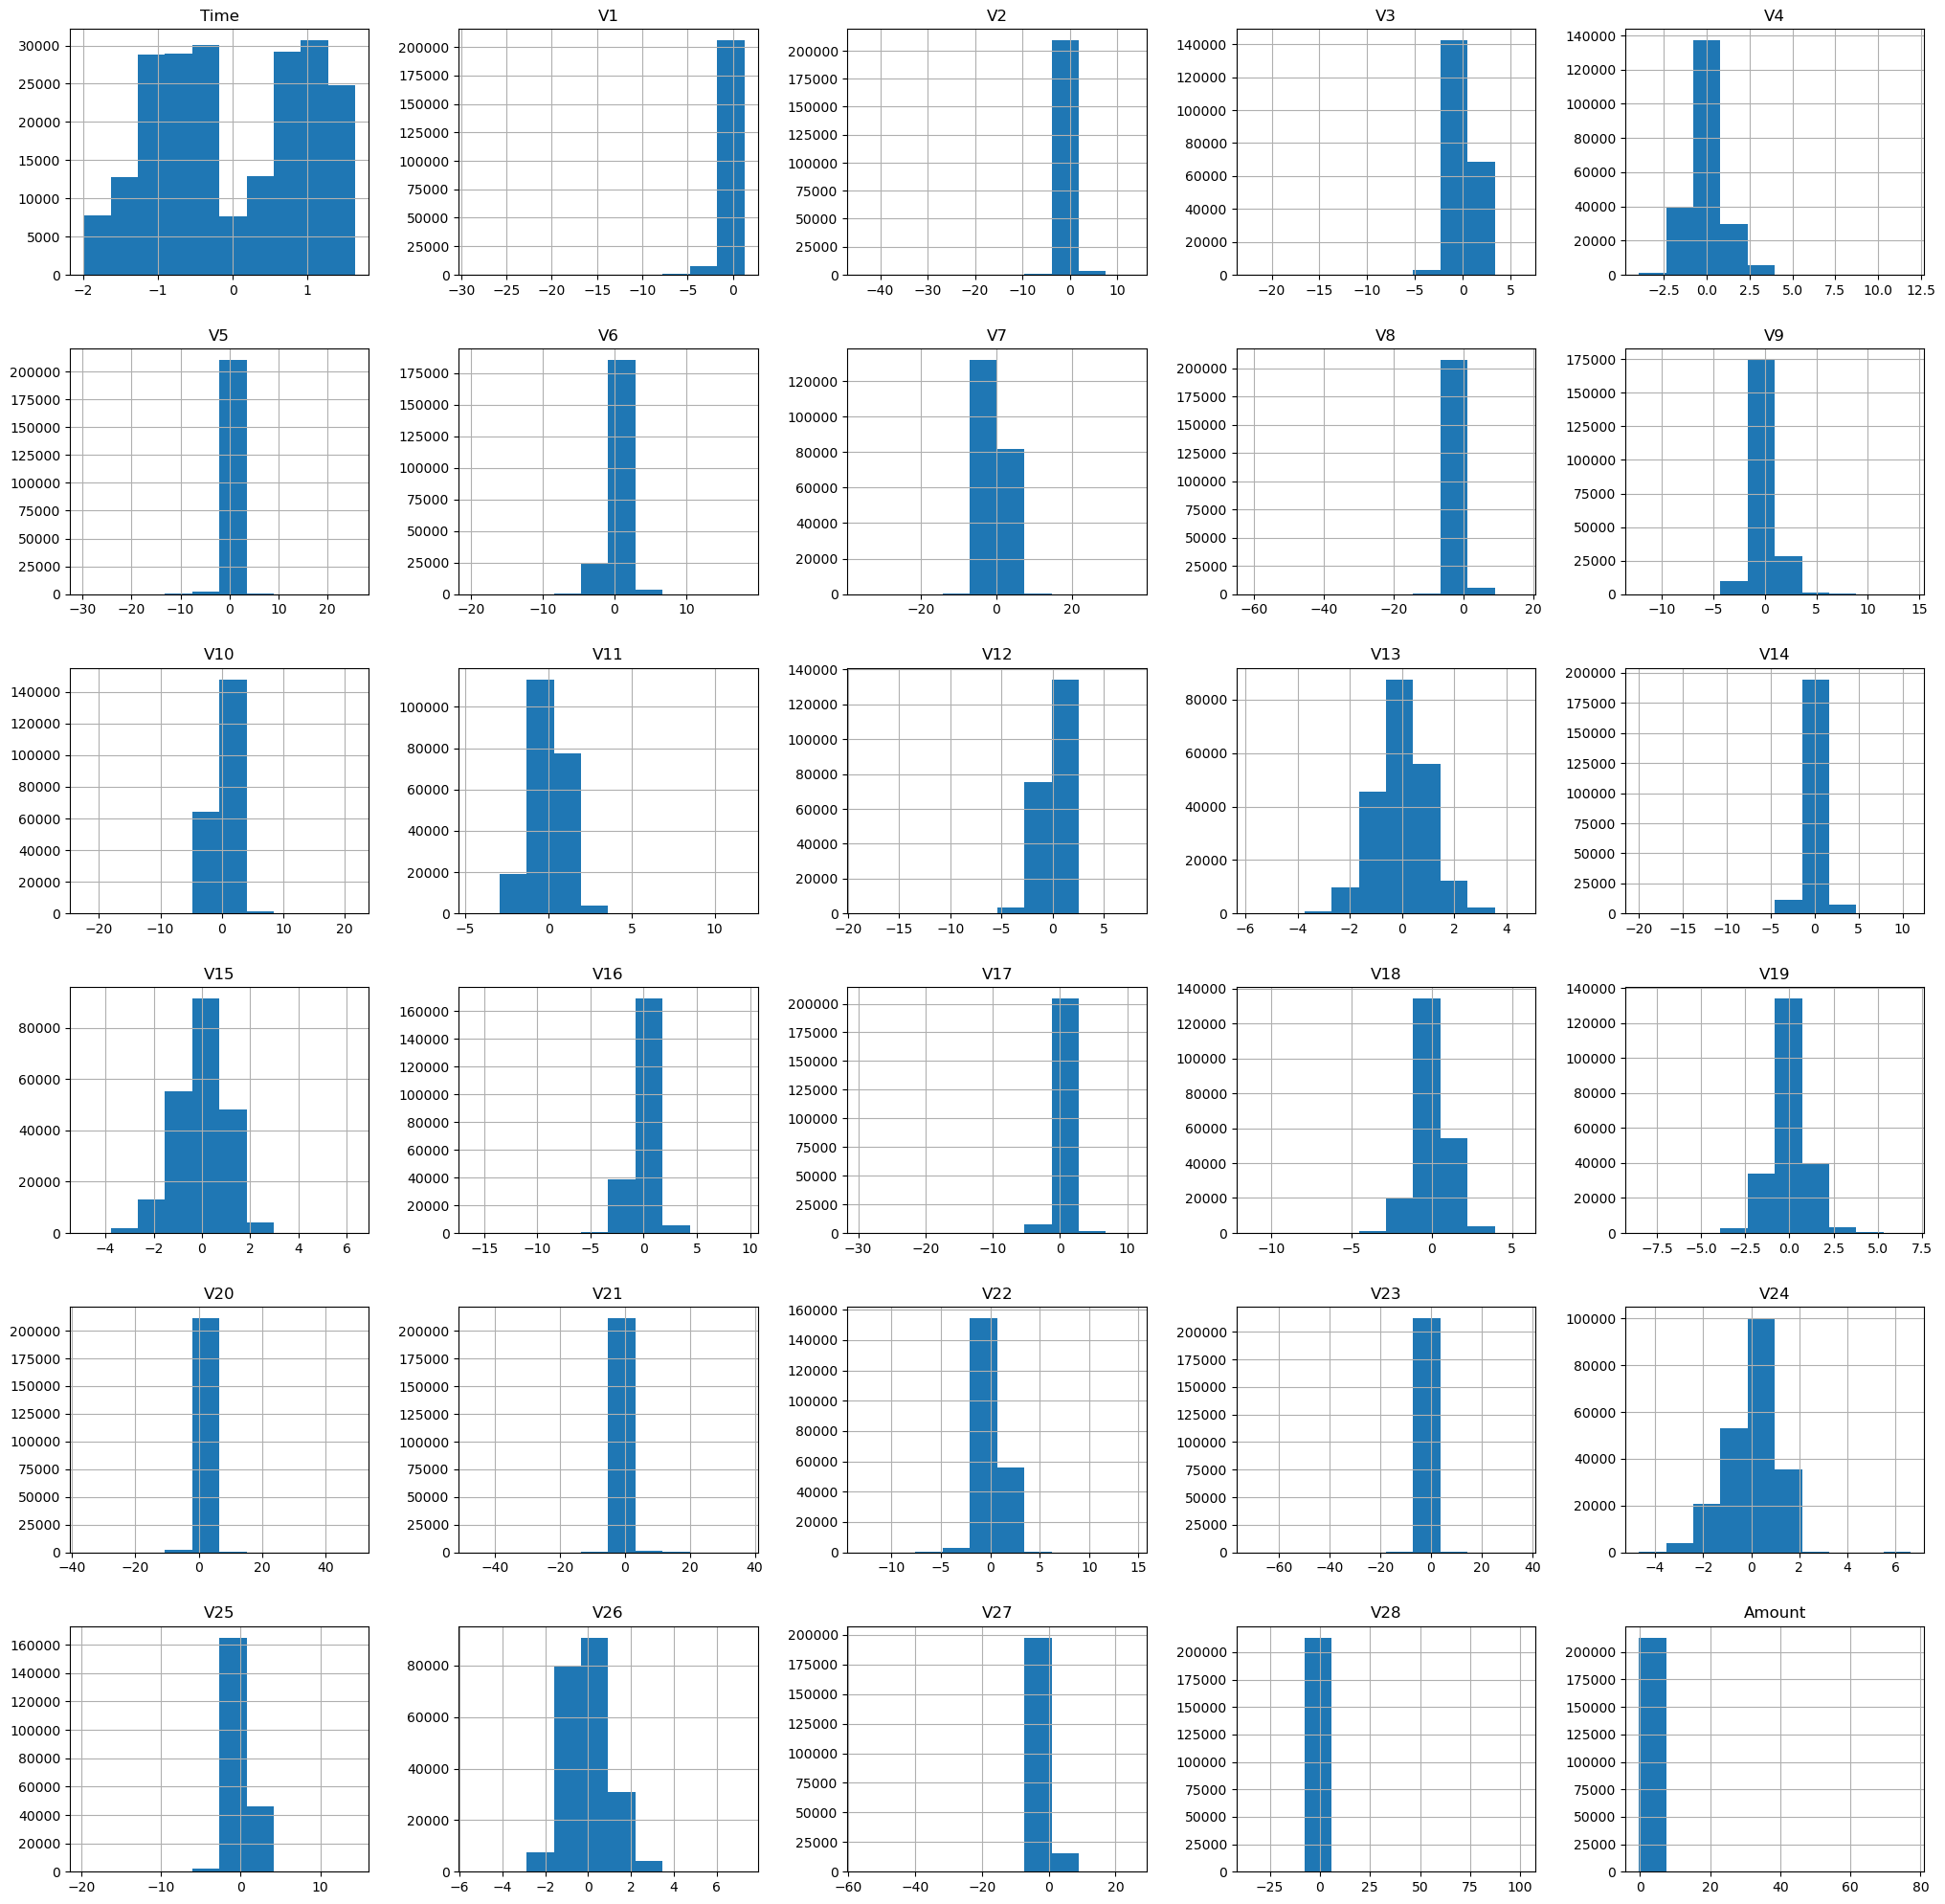

In [34]:
hist = X_train_df.hist(figsize=[25,25])

# Statistical Methods

## Moving average anomaly detection 

Train Set ROC AUC: 0.9473
Train Set Average Precision: 0.1748


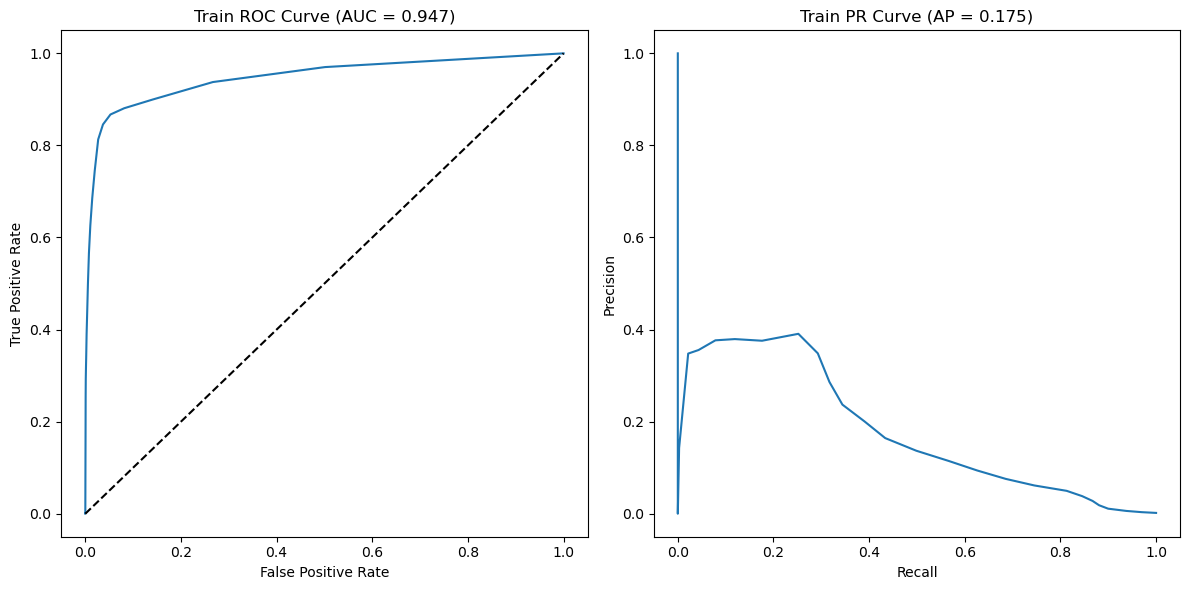

Test Set ROC AUC: 0.9422
Test Set Average Precision: 0.1780


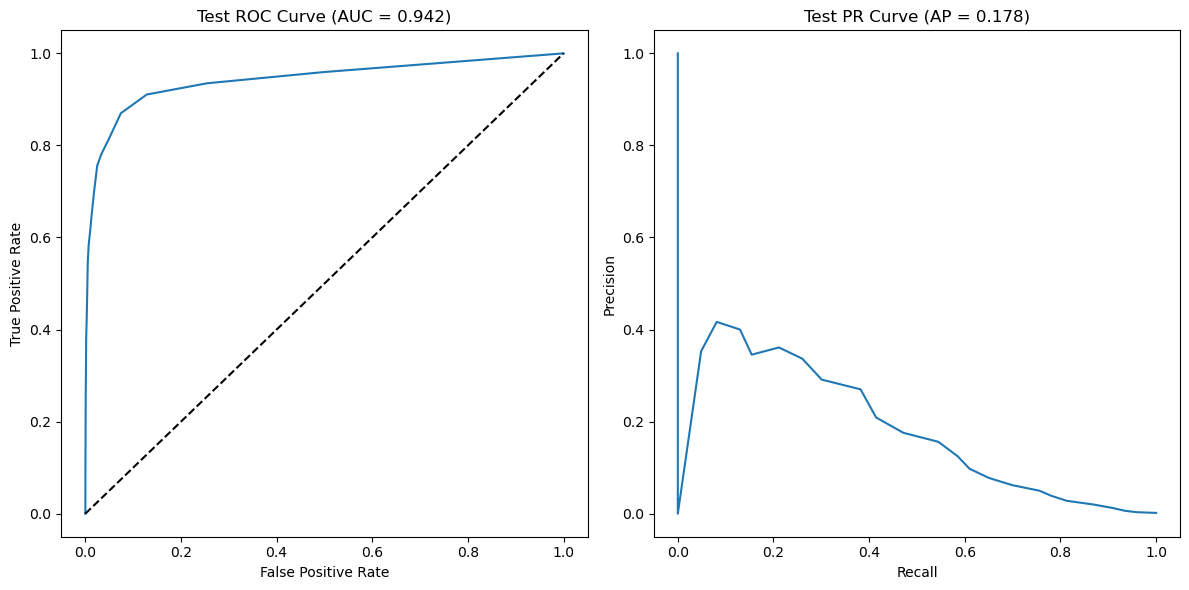

In [343]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

window = 500
selected_features = X_train_df.columns.tolist()  # Get all columns

train_data = X_train_df[selected_features].copy()

rolling_mean_train = train_data.rolling(window=window).mean()
rolling_std_train = train_data.rolling(window=window).std()

# Equal weights
weights = {col: 1.0/len(selected_features) for col in selected_features}

# Detect anomalies in training set
train_anomalies = pd.DataFrame()
for col in selected_features:
    train_anomalies[col] = (
        (train_data[col] > rolling_mean_train[col] + 2*rolling_std_train[col]) | 
        (train_data[col] < rolling_mean_train[col] - 2*rolling_std_train[col])
    )

train_anomaly_scores = train_anomalies.dot(pd.Series(weights)).astype(float)

test_data = X_test_df[selected_features].copy()
last_rolling_mean = rolling_mean_train.iloc[-window:].mean() 
last_rolling_std = rolling_std_train.iloc[-window:].mean()    

# Detect anomalies in testing set
test_anomalies = pd.DataFrame()
for col in selected_features:
    test_anomalies[col] = (
        (test_data[col] > last_rolling_mean[col] + 2*last_rolling_std[col]) | 
        (test_data[col] < last_rolling_mean[col] - 2*last_rolling_std[col])
    )

test_anomaly_scores = test_anomalies.dot(pd.Series(weights)).astype(float)

def evaluate_performance(y_true, anomaly_scores, set_name="Train"):
    fpr, tpr, _ = roc_curve(y_true, anomaly_scores)
    roc_auc = roc_auc_score(y_true, anomaly_scores)
    
    precision, recall, _ = precision_recall_curve(y_true, anomaly_scores)
    ap_score = average_precision_score(y_true, anomaly_scores)
    
    print(f"{set_name} Set ROC AUC: {roc_auc:.4f}")
    print(f"{set_name} Set Average Precision: {ap_score:.4f}")
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'{set_name} ROC Curve (AUC = {roc_auc:.3f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision)
    plt.title(f'{set_name} PR Curve (AP = {ap_score:.3f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    
    plt.tight_layout()
    plt.show()

evaluate_performance(y_train, train_anomaly_scores, "Train")
evaluate_performance(y_test, test_anomaly_scores, "Test")

In [341]:
def analyze_fp(y_true, anomaly_scores, set_name="Dataset", threshold=None):
    y_pred = (anomaly_scores > threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    fpr = fp / (fp + tn)
    
    print(f"\n=== {set_name} False Positive ===")
    print(f"Threshold used: {threshold:.4f}")
    print(f"False Positive Rate: {fpr:.4f}")
    print(f"False Positives: {fp} / True Negatives: {tn}")
    print(f"True Positives: {tp} / False Negatives: {fn}")
    print(f"Precision: {tp/(tp+fp):.4f}, Recall: {tp/(tp+fn):.4f}") 
    return fp, tn


threshold = np.percentile(train_anomaly_scores, 95)

print("\nFalse Positive Analysis")
train_fp, train_tn = analyze_fp(y_train, train_anomaly_scores, "Train", threshold)
test_fp, test_tn = analyze_fp(y_test, test_anomaly_scores, "Test", threshold)

fp_indices = (test_anomaly_scores > threshold) & (y_test == 0)
fp_features = test_anomalies.loc[fp_indices].mean()

fraud_indices = y_test == 1
fraud_features = test_anomalies.loc[fraud_indices].mean()

comparison = pd.DataFrame({
    'False Positives': fp_features,
    'True Fraud': fraud_features,
    'Difference': fraud_features - fp_features
}).sort_values('Difference', ascending=False)

print("\n\nTop features causing false positives:")
print(comparison.head(3))


False Positive Analysis

=== Train False Positive ===
Threshold used: 7.8791
False Positive Rate: 0.0486
False Positives: 10364 / True Negatives: 202872
True Positives: 317 / False Negatives: 52
Precision: 0.0297, Recall: 0.8591

=== Test False Positive ===
Threshold used: 7.8791
False Positive Rate: 0.0468
False Positives: 3323 / True Negatives: 67756
True Positives: 101 / False Negatives: 22
Precision: 0.0295, Recall: 0.8211


Top features causing false positives:
     False Positives  True Fraud  Difference
V17         0.127295    0.829268    0.701974
V12         0.113753    0.796748    0.682995
V14         0.213963    0.878049    0.664085


## Grubbs' test for outliers

Since Grubbs' test is designed for univariate outlier detection, I picked feature V11 since it has the highest correlation with Class

In [169]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def grubbs_test(data, alpha=0.15):
    data = np.array(data)
    n = len(data)
    outliers = []
    clean_data = data.copy()
    
    while True:
        if len(clean_data) < 3:
            break
        mean = np.mean(clean_data)
        std = np.std(clean_data, ddof=1)
        z_scores = np.abs((clean_data - mean) / std)
        max_idx = np.argmax(z_scores)
        
        t_crit = stats.t.ppf(1 - alpha/(2*n), n-2)
        g_crit = ((n-1)/np.sqrt(n)) * np.sqrt((t_crit**2)/(n-2 + t_crit**2))
        g_stat = (n-1) * np.sqrt((z_scores[max_idx]**2)/(n*(n-2) + z_scores[max_idx]**2))
        
        if g_stat > g_crit:
            outliers.append(clean_data[max_idx])
            clean_data = np.delete(clean_data, max_idx)
            n -= 1
        else:
            break
            
    return np.array(outliers), clean_data

v_train = X_train_df['V11'].values
train_outliers, v_train_clean = grubbs_test(v_train)

# Stats from training
mean_train = np.mean(v_train_clean)
std_train = np.std(v_train_clean, ddof=1)

## TESTING ##
v_test = X_test_df['V11'].values
z_scores_test = np.abs((v_test - mean_train) / std_train)

n_train = len(v_train)
alpha = 0.15
t_crit = stats.t.ppf(1 - alpha/(2*n_train), n_train-2)
max_z_threshold = ((n_train-1)/np.sqrt(n_train)) * np.sqrt((t_crit**2)/(n_train-2 + t_crit**2))

test_outlier_mask = z_scores_test > max_z_threshold

print(f"Train outliers detected: {len(train_outliers)}")
print(f"Test outliers detected: {sum(test_outlier_mask)}")
print(f"Critical z-score threshold: {max_z_threshold:.4f}")

print("\nAnomaly detection performance:")
print("Train outliers fraud rate:", y_train[np.isin(v_train, train_outliers)].mean())
print("Test outliers fraud rate:", y_test[test_outlier_mask].mean())

Train outliers detected: 128
Test outliers detected: 36
Critical z-score threshold: 4.9606

Fraud detection performance:
Train outliers fraud rate: 0.8515625
Test outliers fraud rate: 0.75


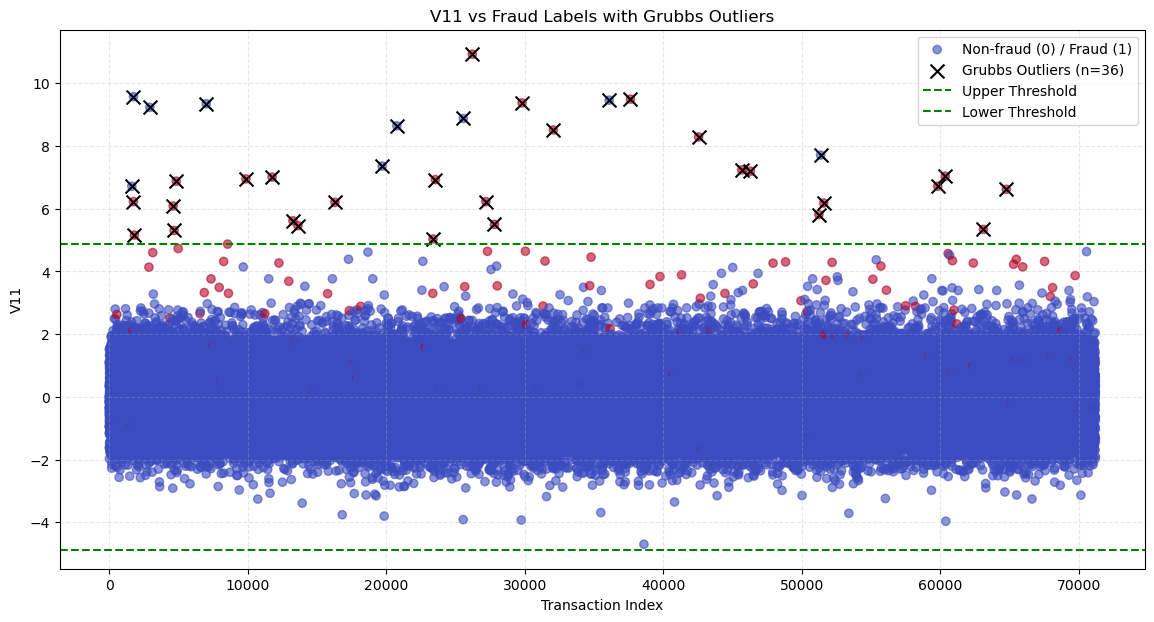

In [266]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 7))

# All data points
scatter = plt.scatter(range(len(X_test_df)), X_test_df['V11'],c=y_test,cmap='coolwarm',
                      alpha=0.6,label='Non-fraud (0) / Fraud (1)')

# 'X' for Outliers
plt.scatter(np.where(test_outlier_mask)[0],  # Outlier index
    X_test_df['V11'][test_outlier_mask],color='black',marker='x',s=100,linewidths=1.5,
    label=f'Grubbs Outliers (n={sum(test_outlier_mask)})')

# Thresholds
plt.axhline(mean_train + max_z_threshold * std_train,color='green',linestyle='--',
    label='Upper Threshold')

plt.axhline(mean_train - max_z_threshold * std_train,color='green',linestyle='--',
    label='Lower Threshold')

plt.xlabel('Transaction Index')
plt.ylabel('V11')
plt.title('V11 vs Fraud Labels with Grubbs Outliers')

plt.legend()

plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


Training Set Performance
ROC AUC: 0.9033
Average Precision: 0.4980


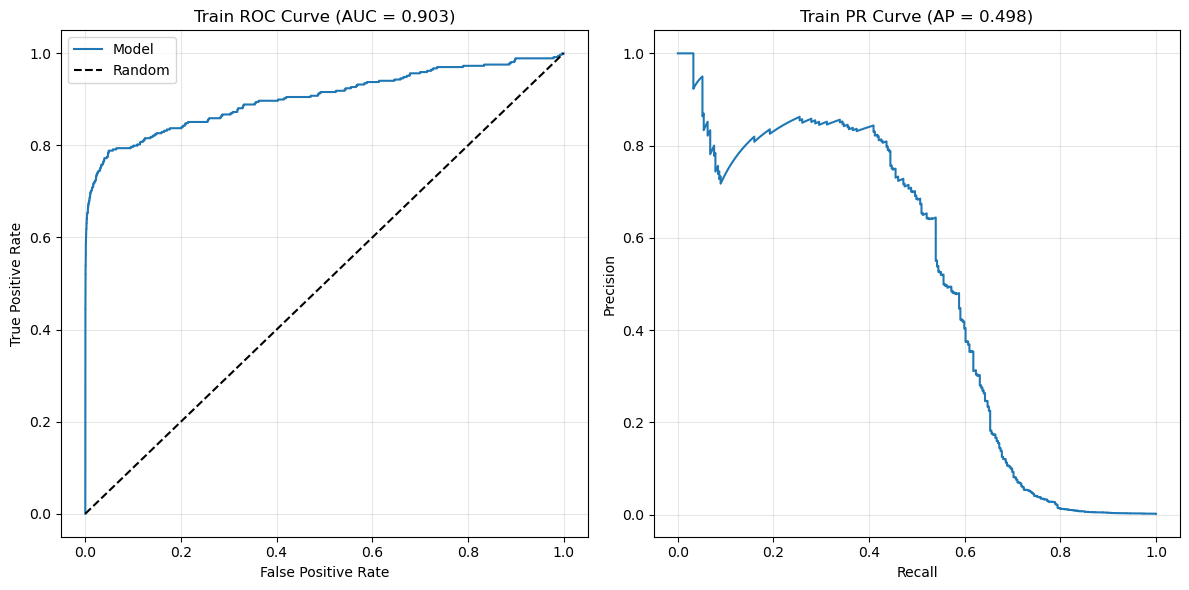


Test Set Performance
ROC AUC: 0.8951
Average Precision: 0.4046


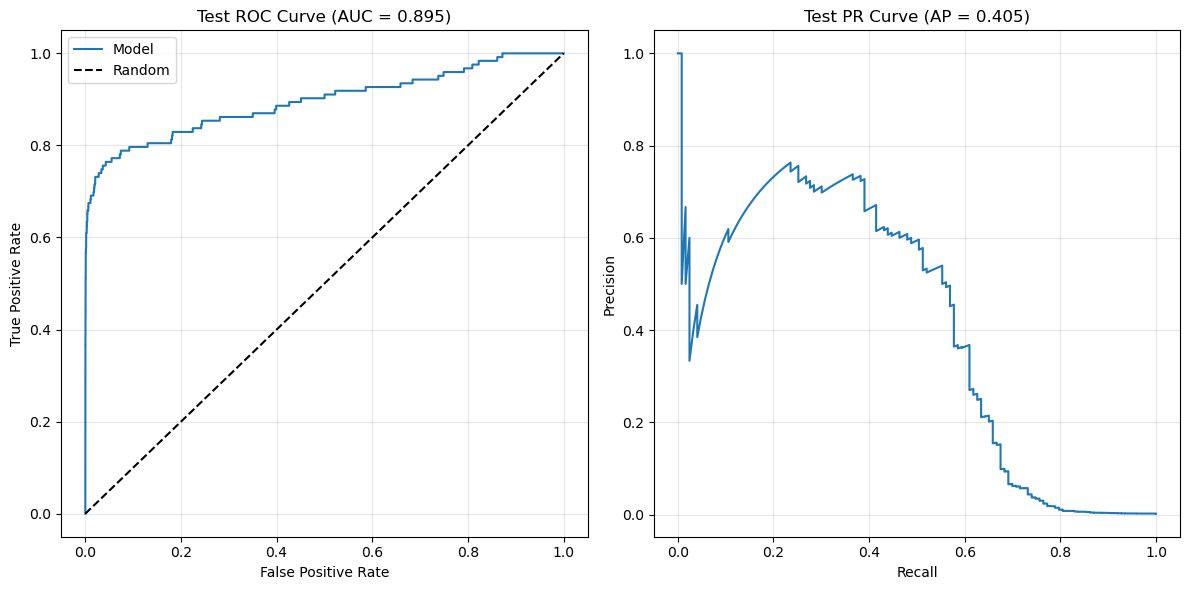

In [305]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

def evaluate_grubbs_performance(y_true, data_values,set_name):
    z_scores = np.abs((data_values - mean_train) / std_train)
    
    fpr, tpr, _ = roc_curve(y_true, z_scores)
    roc_auc = roc_auc_score(y_true, z_scores)
    
    precision, recall, _ = precision_recall_curve(y_true, z_scores)
    ap_score = average_precision_score(y_true, z_scores)
    
    print(f'ROC AUC: {roc_auc:.4f}')
    print(f'Average Precision: {ap_score:.4f}')
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label='Model')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.title(f'{set_name} ROC Curve (AUC = {roc_auc:.3f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision)
    plt.title(f'{set_name} PR Curve (AP = {ap_score:.3f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print("\nTraining Set Performance")
evaluate_grubbs_performance(y_train, X_train_df['V11'].values, "Train")

print("\nTest Set Performance")
evaluate_grubbs_performance(y_test, X_test_df['V11'].values, "Test")

In [353]:
def analysis(y_real, data_values,set_name):
    z_scores = np.abs(( data_values - mean_train) / std_train)
    is_outlier = z_scores > max_z_threshold
    
    tn, fp, fn, tp = confusion_matrix(y_real, is_outlier).ravel()
    fpr = fp / (fp + tn)
    
    print(f"\n{set_name} Set False Positive Analysis:")
    print(f"False Positive Rate: {fpr:.4f}")
    print(f"False Positives: {fp} / True Negatives: {tn}")
    print(f"True Positives: {tp} / False Negatives: {fn}")
analysis(y_train, X_train_df['V11'].values, "Train")
analysis(y_test, X_test_df['V11'].values, "Test")


Train Set False Positive Analysis:
False Positive Rate: 0.0001
False Positives: 19 / True Negatives: 213217
True Positives: 109 / False Negatives: 260

Test Set False Positive Analysis:
False Positive Rate: 0.0001
False Positives: 9 / True Negatives: 71070
True Positives: 27 / False Negatives: 96


# Distance-Based Methods

## KNN anomaly detection

In [270]:
from sklearn.neighbors import NearestNeighbors
k = 5 
knn = NearestNeighbors(n_neighbors=k, metric='euclidean')
knn.fit(X_train_df)

NearestNeighbors(metric='euclidean')

In [276]:
def get_anomaly_scores(model, data):
    distances, _ = model.kneighbors(data)
    return distances.mean(axis=1)

train_scores = get_anomaly_scores(knn, X_train_df)
test_scores = get_anomaly_scores(knn, X_test_df)

Train Set ROC AUC: 0.9432
Train Set Average Precision: 0.0494


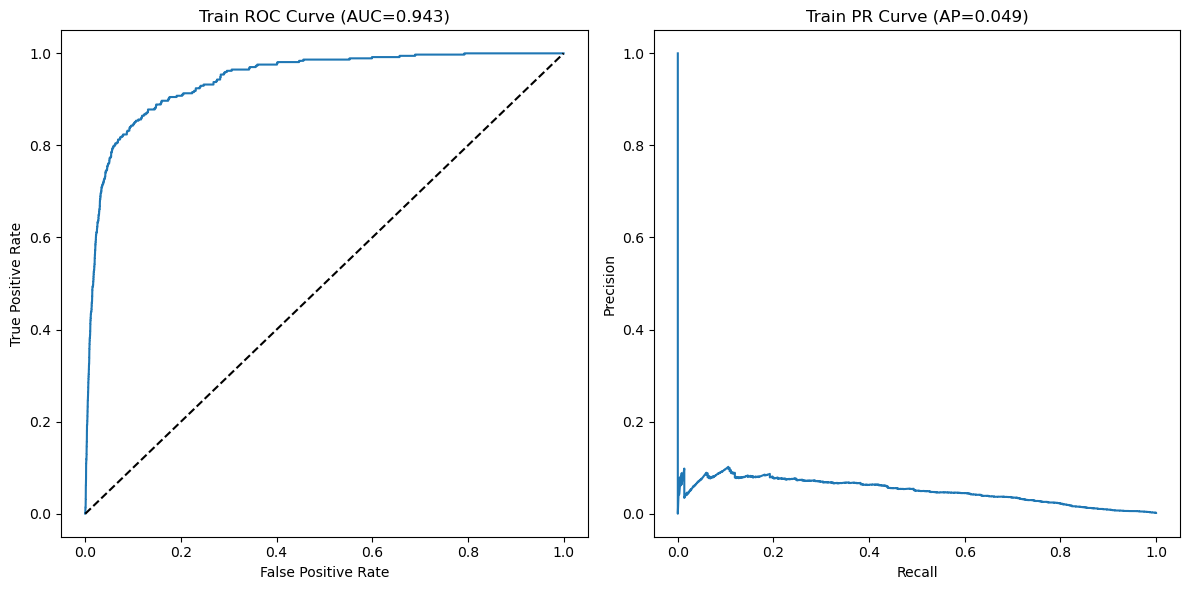

Test Set ROC AUC: 0.9177
Test Set Average Precision: 0.0423


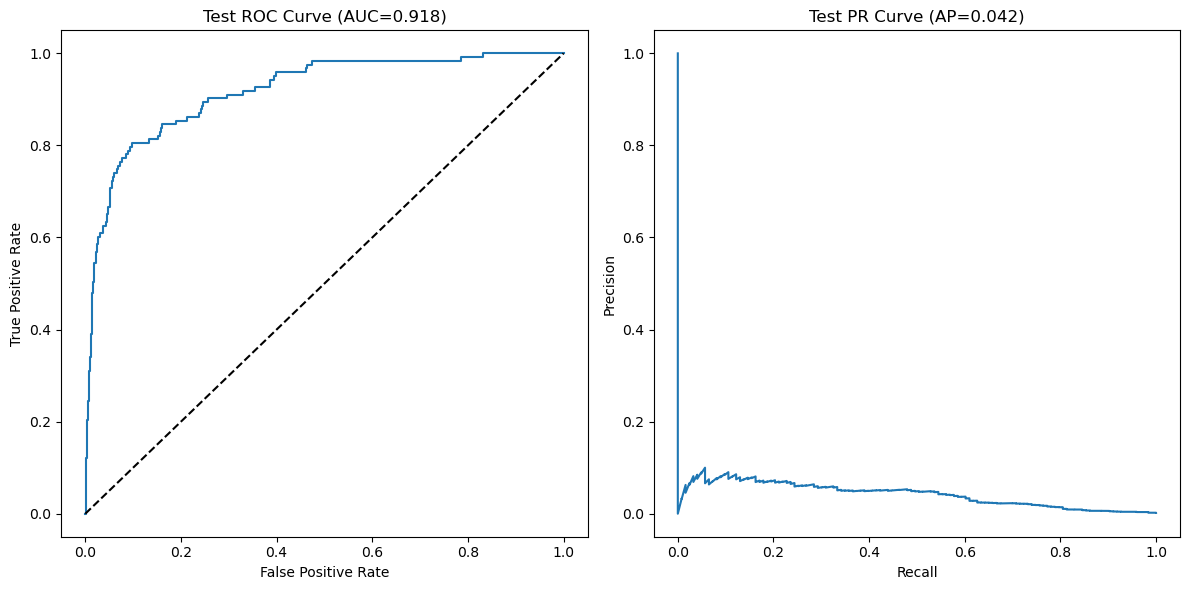

In [273]:
def evaluate(y_true, scores, set_name):
    auc = roc_auc_score(y_true, scores)
    ap = average_precision_score(y_true, scores)
    
    print(f"{set_name} Set ROC AUC: {auc:.4f}")
    print(f"{set_name} Set Average Precision: {ap:.4f}")
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    fpr, tpr, _ = roc_curve(y_true, scores)
    ax1.plot(fpr, tpr)
    ax1.plot([0, 1], [0, 1], 'k--')
    ax1.set_title(f'{set_name} ROC Curve (AUC={auc:.3f})')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    
    precision, recall, _ = precision_recall_curve(y_true, scores)
    ax2.plot(recall, precision)
    ax2.set_title(f'{set_name} PR Curve (AP={ap:.3f})')
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    
    plt.tight_layout()
    plt.show()

evaluate(y_train, train_scores, "Train")
evaluate(y_test, test_scores, "Test")

In [274]:
def find_optimal_threshold(y_true, scores):
    precision, recall, thresholds = precision_recall_curve(y_true, scores)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
    optimal_idx = np.argmax(f1_scores)
    return thresholds[optimal_idx]

threshold = find_optimal_threshold(y_train, train_scores)
print(f"\nOptimal threshold (from training): {threshold:.4f}")


Optimal threshold (from training): 5.3777


In [275]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
y_pred_train = (train_scores > threshold).astype(int)
y_pred_test = (test_scores > threshold).astype(int)

print("Training Performance:")
print(classification_report(y_train, y_pred_train, target_names=['Normal', 'Fraud']))
print("Test Performance:")
print(classification_report(y_test, y_pred_test, target_names=['Normal', 'Fraud']))

conf_matrix = confusion_matrix(y_test, y_pred_test)
print("\nTest Confusion Matrix:")
print(pd.DataFrame(conf_matrix, index=['Actual Normal', 'Actual Fraud'],
                   columns=['Predicted Normal', 'Predicted Fraud']))

Training Performance:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00    213236
       Fraud       0.09      0.19      0.12       369

    accuracy                           1.00    213605
   macro avg       0.54      0.59      0.56    213605
weighted avg       1.00      1.00      1.00    213605

Test Performance:
              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99     71079
       Fraud       0.06      0.33      0.10       123

    accuracy                           0.99     71202
   macro avg       0.53      0.66      0.55     71202
weighted avg       1.00      0.99      0.99     71202


Test Confusion Matrix:
               Predicted Normal  Predicted Fraud
Actual Normal             70419              660
Actual Fraud                 83               40


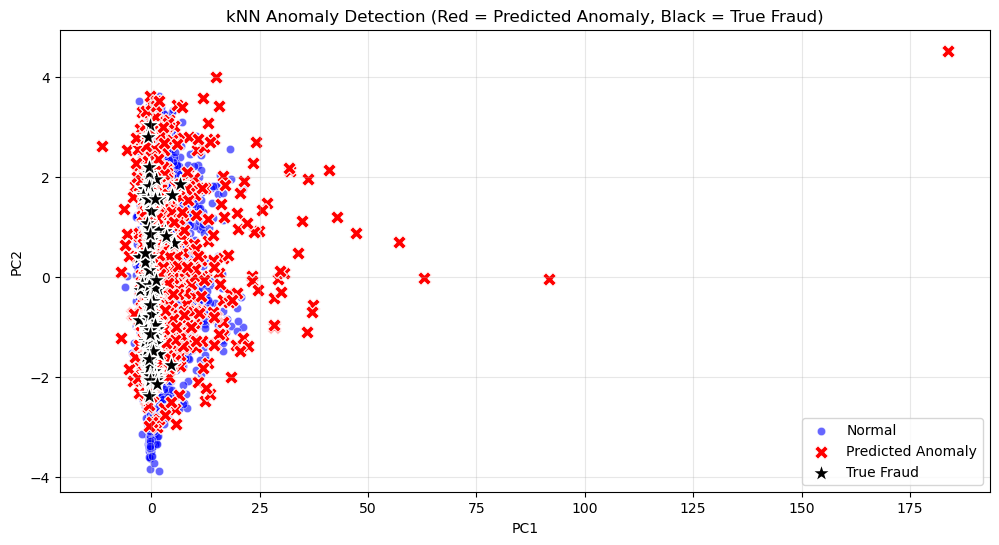

In [355]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Perform PCA to reduce to 2-D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_df)

plot_df = pd.DataFrame({'PC1': X_pca[:, 0],'PC2': X_pca[:, 1],
    'Is_Anomaly': y_pred_test,'Is_Fraud': y_test})

plt.figure(figsize=(12, 6))

# Normal points
sns.scatterplot(data=plot_df[plot_df['Is_Anomaly'] == 0],x='PC1', y='PC2',
    color='blue',alpha=0.6,label='Normal')

# Outliers
sns.scatterplot(data=plot_df[plot_df['Is_Anomaly'] == 1],x='PC1', y='PC2',
    color='red',s=100,marker='X',label='Predicted Anomaly')

# Plot true fraud
sns.scatterplot(data=plot_df[plot_df['Is_Fraud'] == 1],x='PC1', y='PC2',
    color='black',s=200,marker='*',label='True Fraud')

plt.title('kNN Anomaly Detection (Red = Predicted Anomaly, Black = True Fraud)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## DBSCAN clustering-based anomaly detection 

In [262]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import NearestNeighbors
import numpy as np

dbscan = DBSCAN(eps=0.5, min_samples=100)
train_clusters = dbscan.fit_predict(X_train_scaled)

y_pred_train = np.where(train_clusters == -1, 1, 0)
print("\n Training Performance:")
print(classification_report(y_train, y_pred_train, target_names=['Normal','Fraud']))

core_samples = dbscan.components_
nearest_neighbor = NearestNeighbors(n_neighbors=1).fit(core_samples)

train_distances, _ = nearest_neighbor.kneighbors(X_train_scaled)
train_anomaly_scores = train_distances.mean(axis=1)

test_distances, _ = nearest_neighbor.kneighbors(X_test_scaled)
test_anomaly_scores = test_distances.mean(axis=1)

threshold = np.percentile(distances, 95)  # Threshold of 95%
y_pred_test = (test_anomaly_scores > threshold).astype(int)

print("Test Performance:")
print(classification_report(y_test, y_pred_test, target_names=['Normal', 'Fraud']))

conf_matrix = confusion_matrix(y_test, y_pred_test)
print("\nTest Confusion Matrix:")
print(pd.DataFrame(conf_matrix, index=['Actual Normal', 'Actual Fraud'],
                   columns=['Predicted Normal', 'Predicted Fraud']))



 Training Performance:
              precision    recall  f1-score   support

      Normal       1.00      0.02      0.03    213236
       Fraud       0.00      1.00      0.00       369

    accuracy                           0.02    213605
   macro avg       0.50      0.51      0.02    213605
weighted avg       1.00      0.02      0.03    213605

Test Performance:
              precision    recall  f1-score   support

      Normal       1.00      0.95      0.97     71079
       Fraud       0.03      0.83      0.06       123

    accuracy                           0.95     71202
   macro avg       0.51      0.89      0.52     71202
weighted avg       1.00      0.95      0.97     71202


Test Confusion Matrix:
               Predicted Normal  Predicted Fraud
Actual Normal             67620             3459
Actual Fraud                 21              102


Train Set ROC AUC: 0.9512
Train Set Average Precision: 0.1500


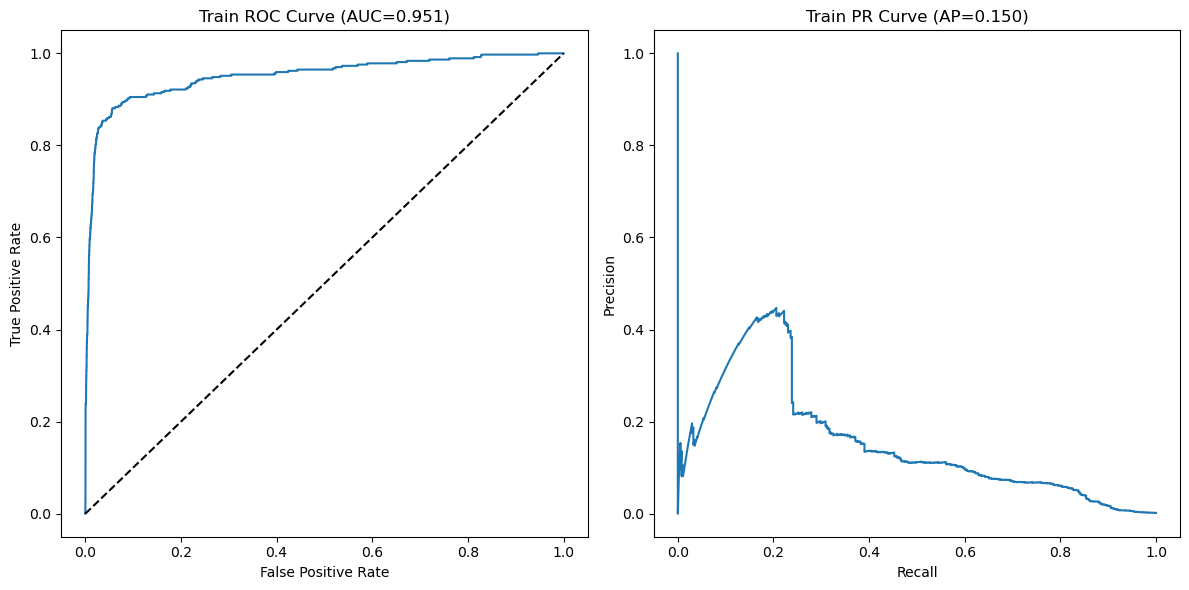

Test Set ROC AUC: 0.9345
Test Set Average Precision: 0.1329


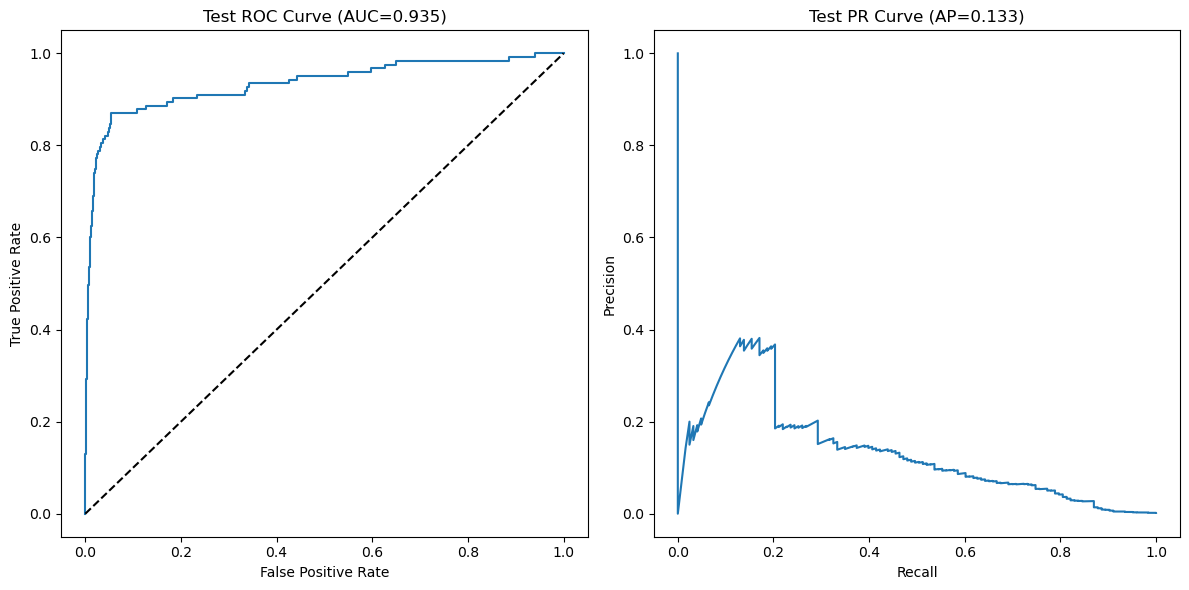

In [263]:
def evaluate(y_true, scores, set_name):
    auc = roc_auc_score(y_true, scores)
    ap = average_precision_score(y_true, scores)
    
    print(f"{set_name} Set ROC AUC: {auc:.4f}")
    print(f"{set_name} Set Average Precision: {ap:.4f}")
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    fpr, tpr, _ = roc_curve(y_true, scores)
    ax1.plot(fpr, tpr)
    ax1.plot([0, 1], [0, 1], 'k--')
    ax1.set_title(f'{set_name} ROC Curve (AUC={auc:.3f})')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    
    precision, recall, _ = precision_recall_curve(y_true, scores)
    ax2.plot(recall, precision)
    ax2.set_title(f'{set_name} PR Curve (AP={ap:.3f})')
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    
    plt.tight_layout()
    plt.show()

evaluate(y_train, train_anomaly_scores, "Train")
evaluate(y_test, test_anomaly_scores, "Test")

## Conclusion

Out of all of the anomaly detection methodology, Grubbs test has the worst performance but that is to be expected as it's designed for a univariate dataset and assume normal data distribution. While V11 has the highest correlation to Class, it's only 0.15 which is not great. The best method for anomaly detection for this particular dataset is KNN anomaly detection with k = 5.